### Supervised Learning - Linear Regression

In [51]:
# Getting data and setting up data 

import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [52]:
# Imports for plotting

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [53]:
# Boston dataset inside the scikit learn. For training purposes.
from sklearn.datasets import load_boston

boston = load_boston()


In [54]:
# Printed out the prebuilt describe method of boston dataset
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of houses')

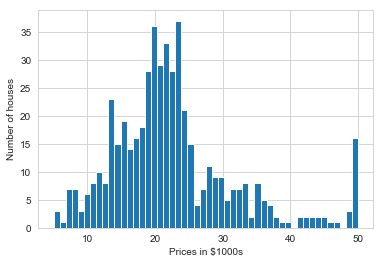

In [55]:
# Let's visualize our data in order to see if have some anomaly.
plt.hist(boston.target,bins = 50)

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')


Text(0.5, 0, 'Number of Rooms')

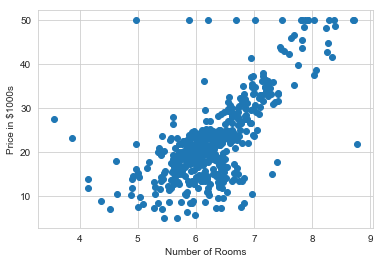

In [56]:
plt.scatter(boston.data[:,5],boston.target)

plt.ylabel('Price in $1000s')
plt.xlabel('Number of Rooms')

In [57]:
# Resetting all the data as dataframe.
boston_df = DataFrame(boston.data)

boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [58]:
boston_df['Price'] = boston.target

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


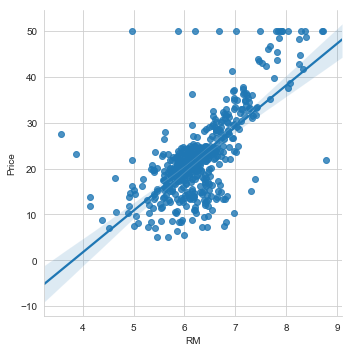

In [59]:
# Basically a linear fit scatter plot with seaborn's lmplot.
sns.lmplot('RM','Price',data = boston_df)

In [60]:
# Import for Linear Regression

import sklearn 
from sklearn.linear_model import LinearRegression

In [61]:
# Created linear regression object.
lreg = LinearRegression()


In [62]:
# Let's split our data for target and data.

X_multi = boston_df.drop('Price',1)

Y_target = boston_df.Price

In [63]:
# Now let's fit our model to data.

lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [64]:
print(' The estimated intercept coefficient is %.2f ' % lreg.intercept_)

print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The estimated intercept coefficient is 36.46 
 The number of coefficients used was 13 


In [65]:
# Got all the column names as data.
coeff_df = DataFrame(boston_df.columns)
# Then we created a column that contains all these previous column data.
coeff_df.columns = ['Features']

# Then we created a new column with the series of coefficents corresponding to the our features.
coeff_df['Coefficient Estimate'] = Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [66]:
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X,boston_df.Price)

In [67]:
print (X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(379, 1) (127, 1) (379,) (127,)


In [68]:
lreg = LinearRegression()

# Let's fit our model to our train datasets.
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
# Used our training and test set to predict.
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [70]:
# Then we used MSE to check errors.

MSE_train = sklearn.metrics.mean_squared_error(Y_train, pred_train)
MSE_test = sklearn.metrics.mean_squared_error(Y_test, pred_test)

print ('Fit a model X_train, and calculated MSE with Y_train %.2f ' % MSE_train)

print ('Fit a model X_test, and calculated MSE with Y_test %.2f' % MSE_test)

Fit a model X_train, and calculated MSE with Y_train 45.67 
Fit a model X_test, and calculated MSE with Y_test 37.47


Text(0.5, 1.0, 'Residual Plot')

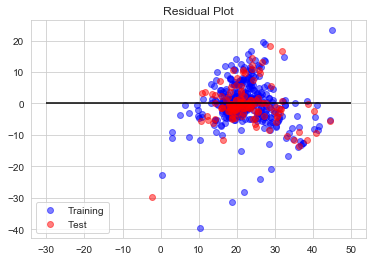

In [73]:
# Let's make a residual plot for evaluation of model.

train = plt.scatter(pred_train,(pred_train-Y_train),c = 'b', alpha=0.5)

test = plt.scatter(pred_test,(pred_test-Y_test),c = 'r', alpha=0.5)

plt.hlines(y=0,xmin=-30,xmax=50)
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plot')
